# Titanic Dataset

In [513]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pprint as pp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

### Data exploration and analysis

In [514]:
titanic = pd.read_csv('train.csv')

In [515]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [516]:
titanic.shape

(891, 12)

In [517]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data cleaning

In [518]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [519]:
titanic = titanic.dropna(subset=['Age'])
titanic = titanic.dropna(subset=['Cabin'])
titanic = titanic.dropna(subset=['Embarked'])

In [520]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [521]:
titanic['Sex'] = titanic['Sex'].replace("male", 1)
titanic['Sex'] = titanic['Sex'].replace("female", 0)

### Data splitting

In [522]:
data = titanic[["PassengerId","Sex","Age","Pclass","Fare","Survived"]]

In [523]:
data.head()

,PassengerId,Sex,Age,Pclass,Fare,Survived
1,2,0,38.0,1,71.2833,1
3,4,0,35.0,1,53.1000,1
6,7,1,54.0,1,51.8625,0
10,11,0,4.0,3,16.7000,1
11,12,0,58.0,1,26.5500,1


In [524]:
x = data.drop(['Survived'], axis=1)
y = data["Survived"]

In [525]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Model building

In [526]:
logistic_regression = LogisticRegression(C=100)

### Model training

In [527]:
logistic_regression.fit(x_train, y_train)

LogisticRegression(C=100)

In [528]:
y_pred = logistic_regression.predict(x_test)

### Model evaluation

In [529]:
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1

0.6486486486486487

In [530]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.74      0.71      0.72        24

    accuracy                           0.65        37
   macro avg       0.62      0.62      0.62        37
weighted avg       0.66      0.65      0.65        37



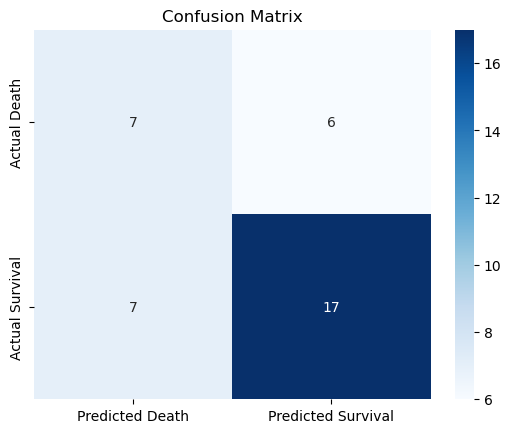

In [531]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Death', 'Predicted Survival'], yticklabels=['Actual Death', 'Actual Survival'])
plt.title('Confusion Matrix')
plt.show()

### Hyperparameter tuning

In [532]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [533]:
logistic_regression = LogisticRegression(C=0.001)

In [534]:
logistic_regression.fit(x_train, y_train)

LogisticRegression(C=0.001)

In [535]:
y_pred = logistic_regression.predict(x_test)

In [536]:
accuracy2 = accuracy_score(y_test, y_pred)
accuracy2

0.7368421052631579

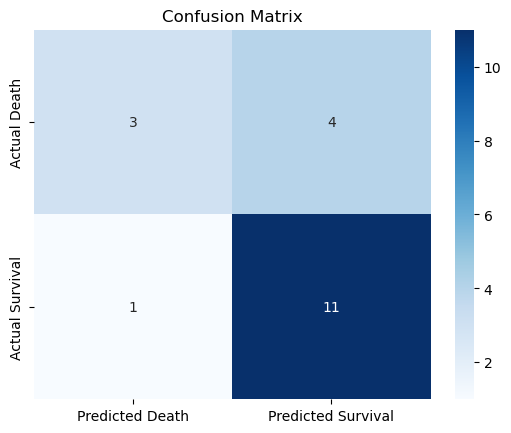

In [537]:
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Death', 'Predicted Survival'], yticklabels=['Actual Death', 'Actual Survival'])
plt.title('Confusion Matrix')
plt.show()

### Model comparison

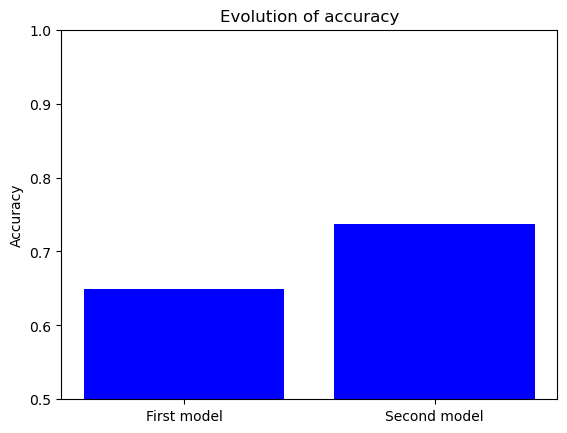

In [538]:
categories = ['First model', 'Second model']
values = [accuracy1, accuracy2]
plt.bar(categories, values, color='blue')
plt.ylim(0.5,1)
plt.title('Evolution of accuracy')
plt.ylabel('Accuracy')
plt.show()

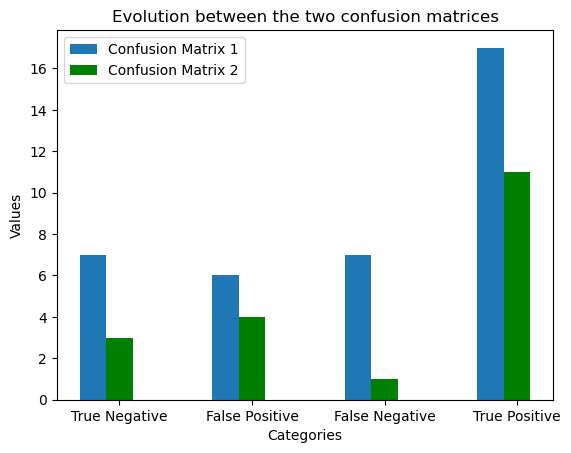

In [539]:
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values_cm1 = cm1.flatten()
values_cm2 = cm2.flatten()
bar_width = 0.2
index = np.arange(len(categories))
plt.bar(index - bar_width, values_cm1, width=bar_width, label='Confusion Matrix 1')
plt.bar(index, values_cm2, width=bar_width, label='Confusion Matrix 2', color='green')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Evolution between the two confusion matrices')
plt.xticks(index, categories)
plt.legend()
plt.show()

### Model saving

In [540]:
joblib.dump(logistic_regression, "Titanic_model.joblib")

['Titanic_model.joblib']